In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
import pandas as pd

In [2]:
data=pd.read_csv("AVdata.csv")

In [3]:
data.head()

,Unnamed: 0,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,day_of_week,1,2
0,0,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0,5,Wednesday,11,2012
1,1,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0,5,Friday,11,2011
2,2,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0,5,Saturday,7,2009
3,3,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0,3,Saturday,5,2012
4,4,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0,4,Monday,6,2010


In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
for var in data:
    data[var]=le.fit_transform(data[var])

In [7]:
data.tail()

,Unnamed: 0,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,incident_time_category,day_of_week,1,2
11772,11772,4,9,3,3,0,0,3,0,5,6,5,3
11773,11773,4,0,0,2,0,0,0,0,0,4,2,2
11774,11774,5,0,24,22,1,0,4,0,5,2,6,0
11775,11775,2,9,7,8,4,1,0,1,1,1,5,5
11776,11776,4,13,7,3,1,0,5,0,4,3,4,1


In [8]:
del data["Unnamed: 0"]

In [9]:
dataset = np.genfromtxt(data, delimiter=",")

In [10]:
dataset[:8]

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
p=data["criticality"]

In [13]:
del data["criticality"]

In [14]:
X=data

In [15]:
X.head()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,incident_time_category,day_of_week,1,2
0,4,9,12,12,0,0,2,5,6,10,3
1,4,0,0,5,0,0,0,5,0,10,2
2,4,10,1,2,1,1,4,5,2,6,0
3,4,0,7,4,0,0,3,3,2,4,3
4,5,0,0,26,0,0,0,4,1,5,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,p,test_size=0.1)
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind='borderline2',ratio={1:5000})
X_res, y_res = sm.fit_sample(X_train,y_train)
balanced_data=pd.DataFrame(X_res)
dependent=pd.DataFrame(y_res)
balanced_data=balanced_data.rename(columns={0:'incident_tehsil', 1:'cause_of_emergency',2:'base_to_scene_distance',3:'scene_to_hospital_distance',4:'roadway_feature',5:'road_type',6:'surrounding_area',7:'incident_time_category',8 :'day_of_week',9 :'1',10:'2'})
features=['incident_tehsil', 'cause_of_emergency','base_to_scene_distance','scene_to_hospital_distance','roadway_feature','road_type','surrounding_area','incident_time_category','day_of_week','1','2']

for var in features:
    balanced_data[var] = balanced_data[var].round()
dependent=dependent.round()

In [17]:
dependent.shape

(15129, 1)

In [18]:
X_train=balanced_data
y_train=dependent

In [19]:
X_train.head()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,incident_time_category,day_of_week,1,2
0,6.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,5.0,2.0,0.0
1,4.0,0.0,6.0,3.0,0.0,1.0,3.0,4.0,0.0,3.0,3.0
2,4.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,2.0,9.0,2.0
3,4.0,0.0,5.0,9.0,0.0,0.0,0.0,2.0,5.0,11.0,2.0
4,5.0,0.0,10.0,15.0,4.0,1.0,0.0,5.0,2.0,6.0,5.0


In [20]:
from keras.layers import Dropout

In [21]:
model = Sequential()
model.add(Dense(units = 11, activation = 'relu', input_dim = 11))
model.add(Dense(units = 16,activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(units = 8,activation = 'relu'))
model.add(Dense(units =1 ,activation = 'sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_train=pd.DataFrame(y_train)

In [24]:
np.array(y_train).shape

(15129, 1)

In [25]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(np.array(X_train), np.array(y_train), batch_size = 32, epochs = 5)

Epoch 1/5
15129/15129 [==============================] - 1s 71us/step - loss: 0.5244 - acc: 0.7404
Epoch 2/5
15129/15129 [==============================] - 1s 40us/step - loss: 0.4539 - acc: 0.7847
Epoch 3/5
15129/15129 [==============================] - 1s 42us/step - loss: 0.4433 - acc: 0.7933
Epoch 4/5
15129/15129 [==============================] - 1s 42us/step - loss: 0.4367 - acc: 0.7958
Epoch 5/5
15129/15129 [==============================] - 1s 48us/step - loss: 0.4298 - acc: 0.7989


In [26]:
z=model.predict(X_test)

In [27]:
z

array([[0.00203022],
       [0.06228853],
       [0.14422323],
       ...,
       [0.6257167 ],
       [0.5161799 ],
       [0.51559925]], dtype=float32)

In [28]:
z=pd.DataFrame(z)

In [29]:
th=[.5,.4,.39,.38,.37,.36,.35,.34,.33,.32,.31,.3,.29,.28,.27,.26,.255,.25,.245,.24,.23,.22,.21,.2,.1,.09,.08,.07,.06,.055,.05,.045,.04,.03,.02,.01,.005]

In [31]:
from sklearn.metrics import roc_auc_score

In [35]:
scores=[]
for k in th:
    z=model.predict(X_test)
    z=pd.DataFrame(z)
    z[z>k]=1
    z[z<=k]=0
    q=roc_auc_score(y_test,z)
    scores.append((q))
scores

[0.6560151660062851,
 0.665169422052193,
 0.6826239923486814,
 0.6909072277633557,
 0.6996345129116,
 0.7070296488591338,
 0.7043653504577128,
 0.7030332012570024,
 0.7104283372045361,
 0.7082080885366854,
 0.7046556906681241,
 0.7019913922667032,
 0.6957746959967209,
 0.690446099193879,
 0.6860056018581774,
 0.6811210547889056,
 0.6780127066539146,
 0.676680557453204,
 0.6744603087853532,
 0.6818554447328871,
 0.6747506489957644,
 0.667645853258642,
 0.6627613061893701,
 0.6556565104522476,
 0.5795702964885914,
 0.5763082388304412,
 0.5743783303730018,
 0.5693400737805712,
 0.5716969531356743,
 0.5697670446782347,
 0.5617741494739719,
 0.5515610056018582,
 0.5522953955458396,
 0.5620474108484765,
 0.5407330236371088,
 0.5349432982647903,
 0.5214680967345265]

In [36]:
z.head()

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


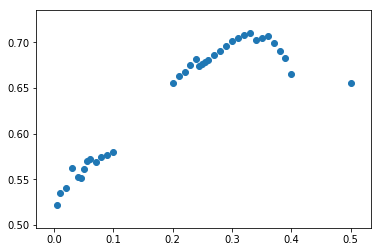

In [37]:
plt.scatter(th,scores)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score,make_scorer

In [39]:
q=roc_auc_score(y_test,z)

In [40]:
q

0.5214680967345265

In [41]:
test=pd.read_csv('test_TQDFDgg.csv')

In [42]:
del test["incident_location"]
del test["victim_id"]
A=test.incident_time.str.split(':', expand=True)
del A[1]
del A[2]
A.rename(columns={0:'incident_time_category'}, inplace=True)
test1=pd.concat([test,A], axis=1)
itemsB=["00","01","02","03"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="0"
itemsB=["04","05","06","07"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="1"
itemsB=["08","09","10","11"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="2"
itemsB=["12","13","14","15"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="3"
itemsB=["16","17","18","19"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="4"
itemsB=["20","21","22","23"]
for x in itemsB:
    test1.loc[test1["incident_time_category"]==x,'incident_time_category']="5"
test1['incident_date1'] = pd.to_datetime(test1['incident_date'])
test1['day_of_week'] = test1['incident_date1'].dt.weekday_name
B=test1.incident_date.str.split('-', expand=True)
final_test=pd.concat([test1,B] , axis=1)
del final_test["incident_date1"]
del final_test[0]
del final_test["incident_time"]
del final_test["incident_date"]

In [43]:
categorical_variable=final_test.dtypes[final_test.dtypes=="object"].index.values
for var in categorical_variable:
    final_test[var]=le.fit_transform(final_test[var])

In [44]:
submission=model.predict(final_test)

In [45]:
sub=pd.DataFrame(submission)

In [46]:
sub.head()
sub[sub>0.25]=1
sub[sub<=0.25]=0

In [47]:
sub.to_csv("submission2.csv")